In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the excel data into pandas dataframe df_rs
df_rs=pd.read_excel("dataset/Solution gas-oil ratio (Rs).xlsx",header=2)
df_rs

,Well,Rs,T(F),Density,API,Gas gravity,Pb,P,yg,Rs.1,...,X.1,Pb*,Rs.4,Error%.3,Rs.5,Error%.4,X.2,CN.1,Rs.6,Error%.5
0,Bong,32.300000,142.0,0.9310,20.500000,1.0010,333.0,333.0,-0.127030,47.758751,...,0.471620,2.962241,51.832714,60.472798,48.071811,48.829136,0.447475,2.802048,50.688874,56.931499
1,NaN,21.380887,142.0,0.9310,20.500000,1.0010,333.0,215.0,-0.127030,28.202396,...,0.344782,2.211987,36.237984,69.487747,26.072256,21.941881,0.447475,2.802048,31.412560,46.918878
2,NaN,7.956277,142.0,0.9310,20.500000,1.0010,333.0,115.0,-0.127030,13.277316,...,0.173667,1.491651,22.359503,181.029728,10.868395,36.601514,0.447475,2.802048,15.845305,99.154778
3,Ga-1,17.900000,133.1,0.8788,29.515020,1.1590,120.0,120.0,-0.247817,22.617309,...,0.184963,1.530956,42.143349,135.437704,22.455815,25.451479,0.653924,4.507375,29.843850,66.725420
4,NaN,9.500000,133.1,0.8788,29.515020,1.1590,120.0,65.0,-0.247817,10.810714,...,0.026546,1.063031,26.951893,183.704139,9.527279,0.287147,0.653924,4.507375,15.262921,60.662328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,NaN,19.300000,193.9,0.8415,36.652109,0.9610,153.0,115.0,-0.281702,19.571546,...,0.173667,1.491651,40.651964,110.631936,13.061910,32.321709,0.632794,4.293327,28.688272,48.643896
219,Na-1,9.800000,193.9,0.8415,36.652109,0.9610,153.0,65.0,-0.281702,9.846743,...,0.026546,1.063031,26.840118,173.878751,5.881590,39.983781,0.632794,4.293327,16.202163,65.328197
220,NaN,10.000000,185.0,0.8688,31.200000,1.0916,90.0,90.0,-0.221650,14.011674,...,0.109505,1.286781,32.012371,220.123713,11.549007,15.490075,0.546097,3.516388,20.347916,103.479160
221,NaN,4.800000,185.0,0.8688,31.200000,1.0916,90.0,50.0,-0.221650,6.904654,...,-0.038625,0.914902,21.075826,339.079710,5.076462,5.759622,0.546097,3.516388,11.295099,135.314566


In [3]:
df_rs1=df_rs.iloc[:222,1:8] #Selecting the desired columns and rows from the above dataset
df_rs1

,Rs,T(F),Density,API,Gas gravity,Pb,P
0,32.300000,142.0,0.9310,20.500000,1.0010,333.0,333.0
1,21.380887,142.0,0.9310,20.500000,1.0010,333.0,215.0
2,7.956277,142.0,0.9310,20.500000,1.0010,333.0,115.0
3,17.900000,133.1,0.8788,29.515020,1.1590,120.0,120.0
4,9.500000,133.1,0.8788,29.515020,1.1590,120.0,65.0
...,...,...,...,...,...,...,...
217,25.640000,193.9,0.8415,36.652109,0.9610,153.0,153.0
218,19.300000,193.9,0.8415,36.652109,0.9610,153.0,115.0
219,9.800000,193.9,0.8415,36.652109,0.9610,153.0,65.0
220,10.000000,185.0,0.8688,31.200000,1.0916,90.0,90.0


In [4]:
stand_Rs=df_rs.iloc[:222,9:10]
stand_Rs

,Rs.1
0,47.758751
1,28.202396
2,13.277316
3,22.617309
4,10.810714
...,...
217,27.600276
218,19.571546
219,9.846743
220,14.011674


In [5]:
vas_beg_Rs=df_rs.iloc[:222,12:13]
vas_beg_Rs

,Rs.2
0,49.931505
1,30.943208
2,15.608552
3,28.362559
4,14.505350
...,...
217,25.640209
218,18.270110
219,9.281560
220,12.909382


In [6]:
pf_Rs=df_rs.iloc[:222,15:16]
pf_Rs

,Rs.3
0,94.482446
1,83.565388
2,74.760822
3,94.579037
4,88.696785
...,...
217,66.694947
218,63.877959
219,60.249980
220,76.084747


In [7]:
glaso_Rs=df_rs.iloc[:222,19:20]
glaso_Rs

,Rs.4
0,51.832714
1,36.237984
2,22.359503
3,42.143349
4,26.951893
...,...
217,50.475256
218,40.651964
219,26.840118
220,32.012371


In [8]:
al_Rs=df_rs.iloc[:222,21:22]
al_Rs

,Rs.5
0,48.071811
1,26.072256
2,10.868395
3,22.455815
4,9.527279
...,...
217,19.471724
218,13.061910
219,5.881590
220,11.549007


In [9]:
km_Rs=df_rs.iloc[:222,25:26]
km_Rs

,Rs.6
0,50.688874
1,31.412560
2,15.845305
3,29.843850
4,15.262921
...,...
217,38.183134
218,28.688272
219,16.202163
220,20.347916


In [10]:
df_rs1.rename(columns={"Rs":"RsActual","T(F)":"T","Gas gravity":"GasGravity"},inplace=True)#Renaming the column names 

In [11]:
df_rs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RsActual    222 non-null    float64
 1   T           222 non-null    float64
 2   Density     222 non-null    float64
 3   API         222 non-null    float64
 4   GasGravity  222 non-null    float64
 5   Pb          222 non-null    float64
 6   P           222 non-null    float64
dtypes: float64(7)
memory usage: 12.3 KB


In [12]:
###Summary Statistics of dataset
summary=df_rs1.describe(include='all')
summary.loc['kurtosis'] = df_rs1.kurtosis()
summary.loc['skewness'] = df_rs1.skew()
#summary.loc['Co-variance'] = df_rs1.cov().stack()
summary.loc['Coefficent of variance'] = df_rs1.std() / df_rs1.mean() * 100

In [13]:
summary

,RsActual,T,Density,API,GasGravity,Pb,P
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,88.319575,174.257973,0.870045,31.203034,0.936758,964.279279,538.399685
std,134.540596,27.017441,0.035949,6.729149,0.267258,1049.722611,679.384500
min,0.795808,125.600000,0.806600,18.871945,0.591500,51.000000,40.000000
25%,17.026464,158.000000,0.836025,27.240942,0.691250,278.000000,118.500000
50%,38.894453,171.900000,0.881600,28.549768,0.916073,576.500000,270.500000
75%,84.667610,194.000000,0.891200,37.753323,1.103000,1016.000000,615.000000
max,770.170000,244.000000,0.941000,43.927721,1.530000,3827.000000,3827.000000
kurtosis,8.161269,-0.084334,-1.019682,-1.071858,-0.788735,1.798715,6.839777
skewness,2.792425,0.423610,0.081689,0.104198,0.586500,1.700081,2.490049


In [14]:
total_dataset_rs = pd.concat([df_rs1,  stand_Rs, vas_beg_Rs, pf_Rs, glaso_Rs, al_Rs, km_Rs], axis=1)
total_dataset_rs.shape

(222, 13)

In [15]:
total_dataset_rs.rename(columns={"Rs":"RsActual","T(F)":"T","Gas gravity":"GasGravity","Rs.1":"stand_Rs","Rs.2":"vas_beg_Rs","Rs.3":"petro_farsh_Rs","Rs.4":"glaso_Rs","Rs.5":"almar_Rs","Rs.6":"karto_Rs"},inplace=True)#Renaming the column names 

In [16]:
total_dataset_rs.head()

,RsActual,T,Density,API,GasGravity,Pb,P,stand_Rs,vas_beg_Rs,petro_farsh_Rs,glaso_Rs,almar_Rs,karto_Rs
0,32.300000,142.0,0.9310,20.50000,1.001,333.0,333.0,47.758751,49.931505,94.482446,51.832714,48.071811,50.688874
1,21.380887,142.0,0.9310,20.50000,1.001,333.0,215.0,28.202396,30.943208,83.565388,36.237984,26.072256,31.412560
2,7.956277,142.0,0.9310,20.50000,1.001,333.0,115.0,13.277316,15.608552,74.760822,22.359503,10.868395,15.845305
3,17.900000,133.1,0.8788,29.51502,1.159,120.0,120.0,22.617309,28.362559,94.579037,42.143349,22.455815,29.843850
4,9.500000,133.1,0.8788,29.51502,1.159,120.0,65.0,10.810714,14.505350,88.696785,26.951893,9.527279,15.262921


In [17]:
total_dataset_rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RsActual        222 non-null    float64
 1   T               222 non-null    float64
 2   Density         222 non-null    float64
 3   API             222 non-null    float64
 4   GasGravity      222 non-null    float64
 5   Pb              222 non-null    float64
 6   P               222 non-null    float64
 7   stand_Rs        222 non-null    float64
 8   vas_beg_Rs      222 non-null    float64
 9   petro_farsh_Rs  222 non-null    float64
 10  glaso_Rs        222 non-null    float64
 11  almar_Rs        222 non-null    float64
 12  karto_Rs        222 non-null    float64
dtypes: float64(13)
memory usage: 22.7 KB


In [18]:
#Check if there are any missing values in the dataset
#Finding missing values in each columns
df_rs1.isna().sum()

RsActual      0
T             0
Density       0
API           0
GasGravity    0
Pb            0
P             0
dtype: int64

In [19]:
total_dataset_rs.isna().sum().any()

False

In [20]:
#Check if there are any duplicated values in the dataset
df_rs1[df_rs1.duplicated()]

,RsActual,T,Density,API,GasGravity,Pb,P


In [21]:
df_rs1.drop_duplicates(inplace=True)#Removing the duplicates from the dataset

In [22]:
total_dataset_rs[total_dataset_rs.duplicated()]

,RsActual,T,Density,API,GasGravity,Pb,P,stand_Rs,vas_beg_Rs,petro_farsh_Rs,glaso_Rs,almar_Rs,karto_Rs


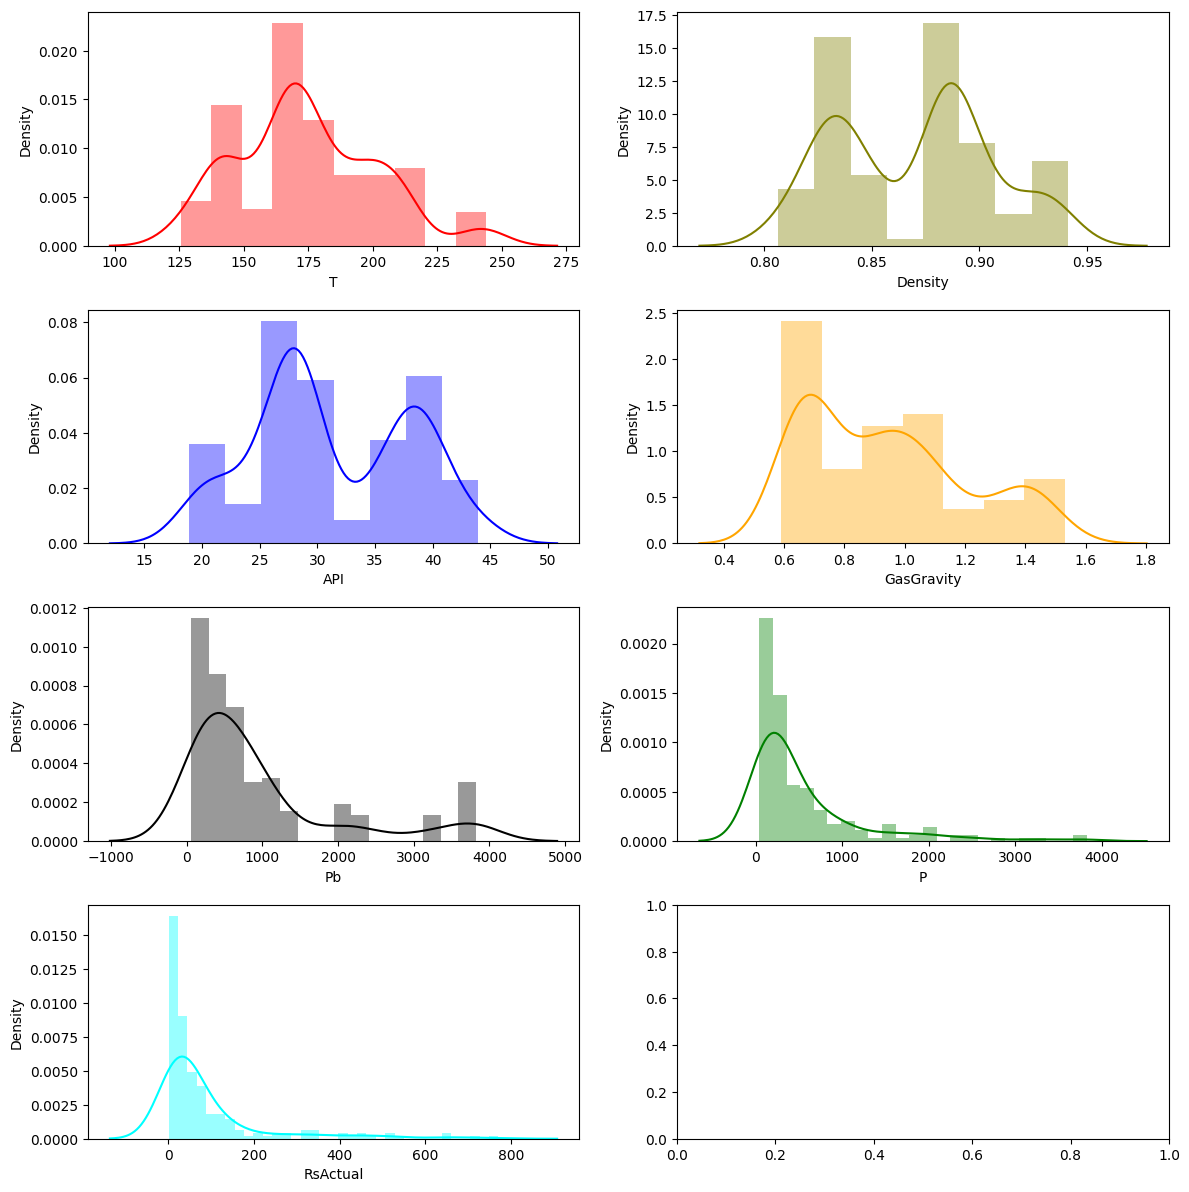

In [23]:
#EDA
#let’s visualize the distribution of each parameter

f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.distplot(df_rs1['T'] , color="red", ax=axes[0, 0])
sns.distplot(df_rs1['Density'] , color="olive", ax=axes[0, 1])
sns.distplot(df_rs1['API'] , color="blue", ax=axes[1, 0])
sns.distplot(df_rs1['GasGravity'] , color="orange", ax=axes[1, 1])
sns.distplot(df_rs1['Pb'] , color="black", ax=axes[2, 0])
sns.distplot(df_rs1['P'] , color="green", ax=axes[2, 1])
sns.distplot(df_rs1['RsActual'] , color="cyan", ax=axes[3, 0])
plt.tight_layout()

#### We conclude that the distribution of each parameter appears to be normal which is desired.

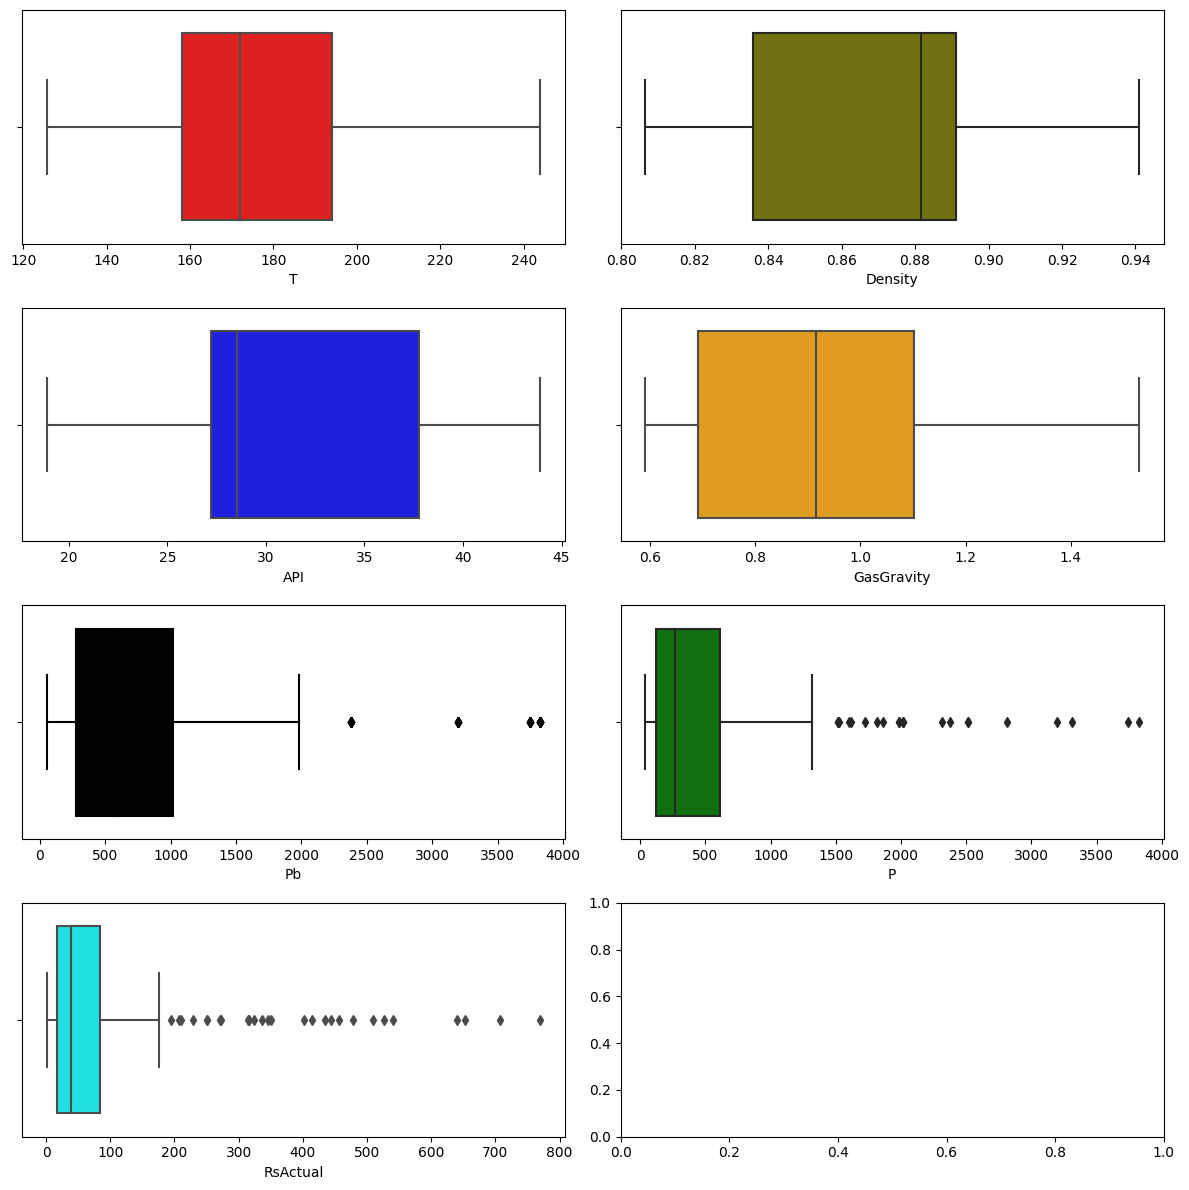

In [24]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(df_rs1['T'] , color="red", ax=axes[0, 0])
sns.boxplot(df_rs1['Density'] , color="olive", ax=axes[0, 1])
sns.boxplot(df_rs1['API'] , color="blue", ax=axes[1, 0])
sns.boxplot(df_rs1['GasGravity'] , color="orange", ax=axes[1, 1])
sns.boxplot(df_rs1['Pb'] , color="black", ax=axes[2, 0])
sns.boxplot(df_rs1['P'] , color="green", ax=axes[2, 1])
sns.boxplot(df_rs1['RsActual'] , color="cyan", ax=axes[3, 0])

plt.tight_layout()

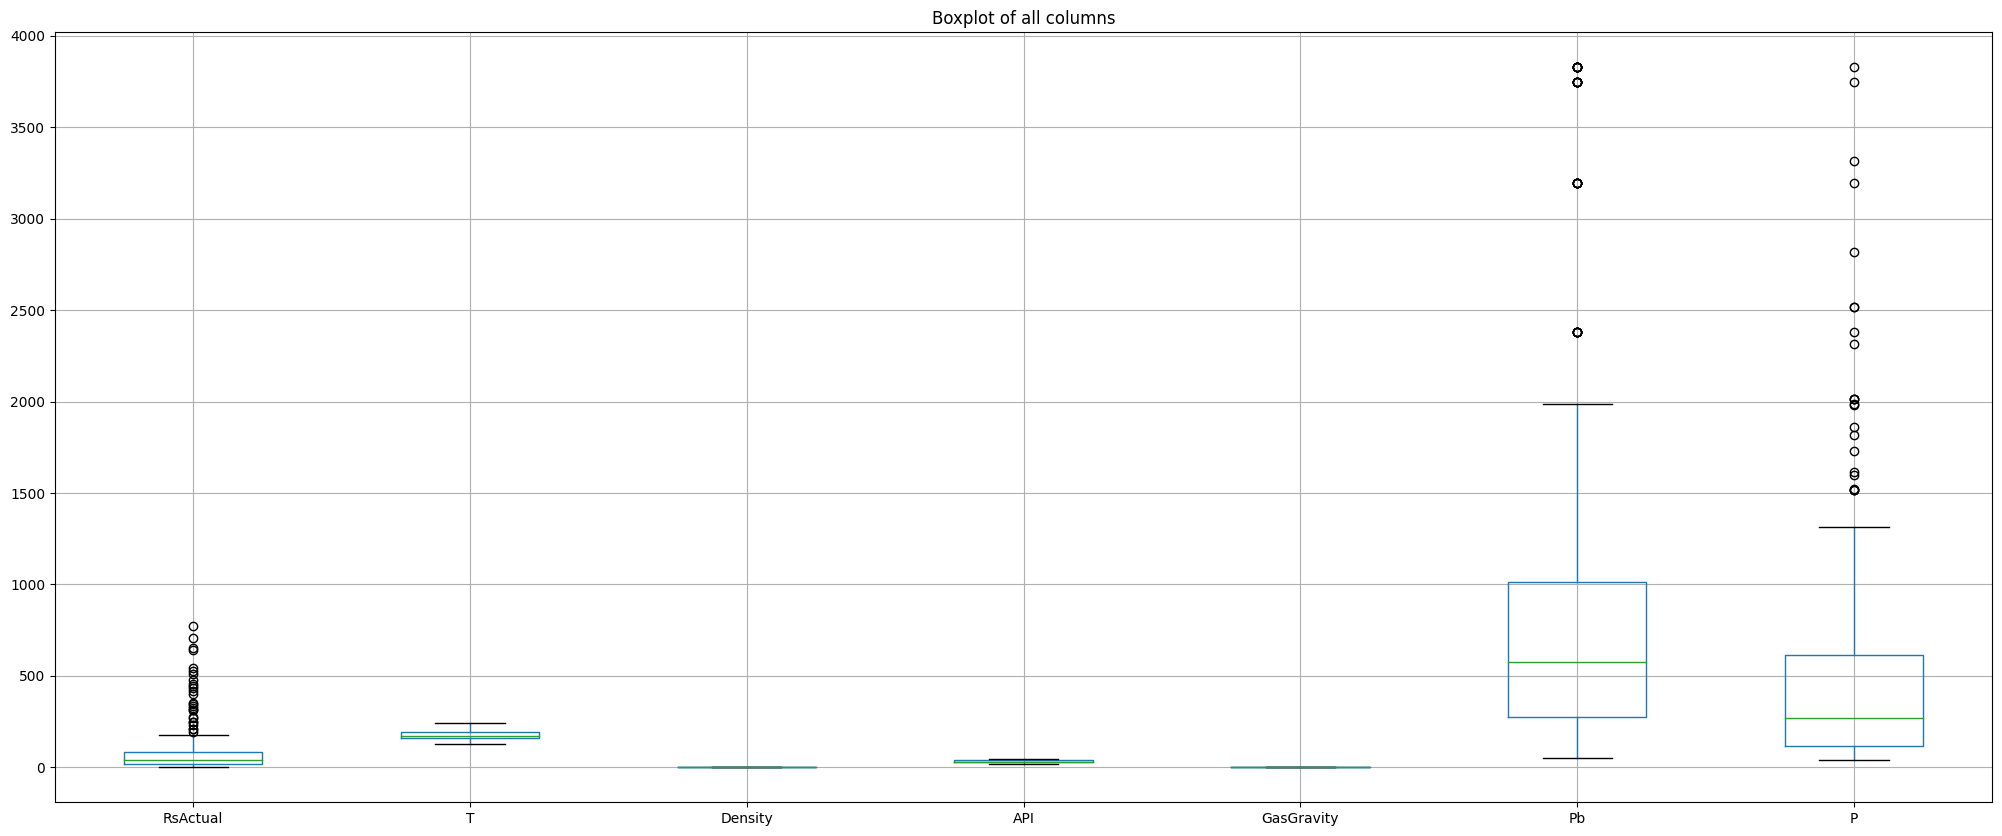

In [25]:
# Plot the boxplot for all columns in the DataFrame
plt.figure(figsize=(25, 10)) # Set the size of the plot
df_rs1.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns') # Add a title to the plot
plt.show() # Show the plot

### It seems there are some outliers in the dataset.

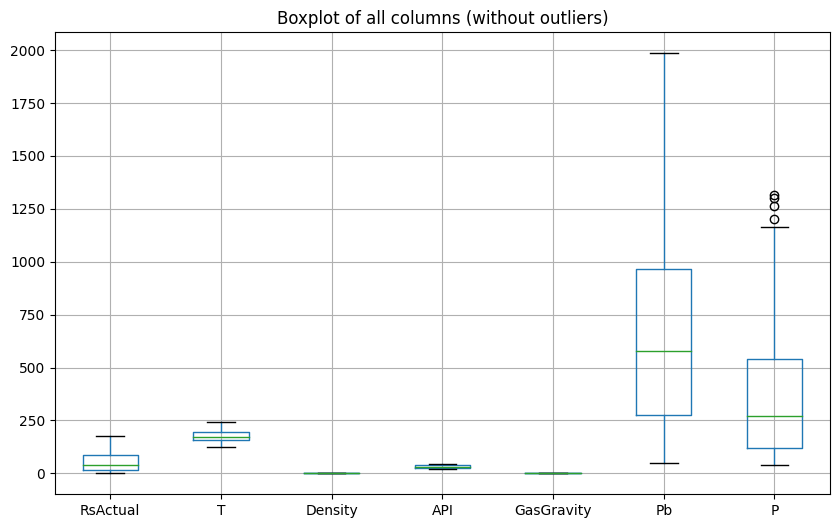

In [26]:
# Calculate the lower and upper bounds for each column using the interquartile range (IQR)
for i in df_rs1.columns:
    Q1 = df_rs1[i].quantile(0.25)
    Q3 = df_rs1[i].quantile(0.75)
    #print(i,Q1,Q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #print("values",IQR,lower_bound,upper_bound)
    # Filter the DataFrame to exclude values outside of the lower and upper bounds
    mean = np.mean(df_rs1[i])
    df_rs1[i] = np.where((df_rs1[i] < lower_bound) | (df_rs1[i] > upper_bound), mean, df_rs1[i])
# Plot the boxplot for all columns in the filtered DataFrame
plt.figure(figsize=(10, 6)) # Set the size of the plot
df_rs1.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns (without outliers)') # Add a title to the plot
plt.show() # Show the plot the DataFrame to exclude values outside of those bounds.

##### We replaced outliers with mean of the column

In [27]:
summary=df_rs1.describe(include='all')
summary.loc['kurtosis'] = df_rs1.kurtosis()
summary.loc['skewness'] = df_rs1.skew()
#summary.loc['Co-variance'] = df_rs1.cov().stack()
summary.loc['Coefficent of variance'] = df_rs1.std() / df_rs1.mean() * 100
summary

,RsActual,T,Density,API,GasGravity,Pb,P
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,50.176758,174.257973,0.870045,31.203034,0.936758,645.627831,363.008661
std,40.196031,27.017441,0.035949,6.729149,0.267258,447.654376,286.548165
min,0.795808,125.600000,0.806600,18.871945,0.591500,51.000000,40.000000
25%,17.026464,158.000000,0.836025,27.240942,0.691250,278.000000,118.500000
50%,38.894453,171.900000,0.881600,28.549768,0.916073,576.500000,270.500000
75%,84.667610,194.000000,0.891200,37.753323,1.103000,964.279279,538.399685
max,175.660000,244.000000,0.941000,43.927721,1.530000,1985.000000,1315.000000
kurtosis,0.019079,-0.084334,-1.019682,-1.071858,-0.788735,1.309515,0.924250
skewness,0.869237,0.423610,0.081689,0.104198,0.586500,1.075290,1.169993


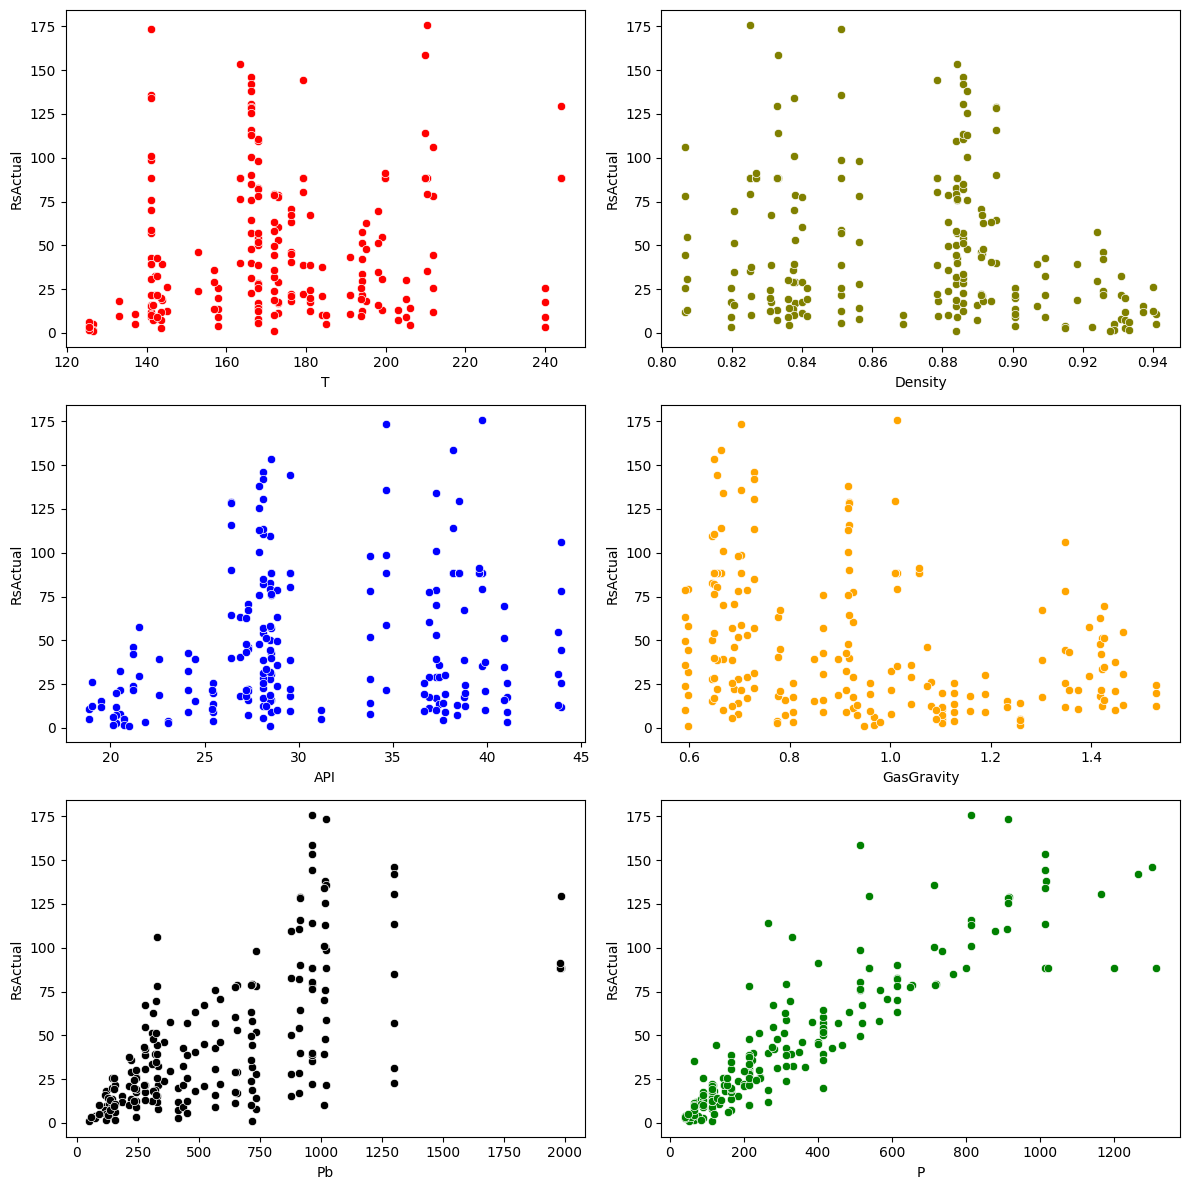

In [28]:
f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.scatterplot(df_rs1['T'],df_rs1['RsActual'] , color="red", ax=axes[0, 0])
sns.scatterplot(df_rs1['Density'],df_rs1['RsActual'] , color="olive", ax=axes[0, 1])
sns.scatterplot(df_rs1['API'],df_rs1['RsActual'] , color="blue", ax=axes[1, 0])
sns.scatterplot(df_rs1['GasGravity'],df_rs1['RsActual'] , color="orange", ax=axes[1, 1])
sns.scatterplot(df_rs1['Pb'] ,df_rs1['RsActual'], color="black", ax=axes[2, 0])
sns.scatterplot(df_rs1['P'] ,df_rs1['RsActual'], color="green", ax=axes[2, 1])

plt.tight_layout()

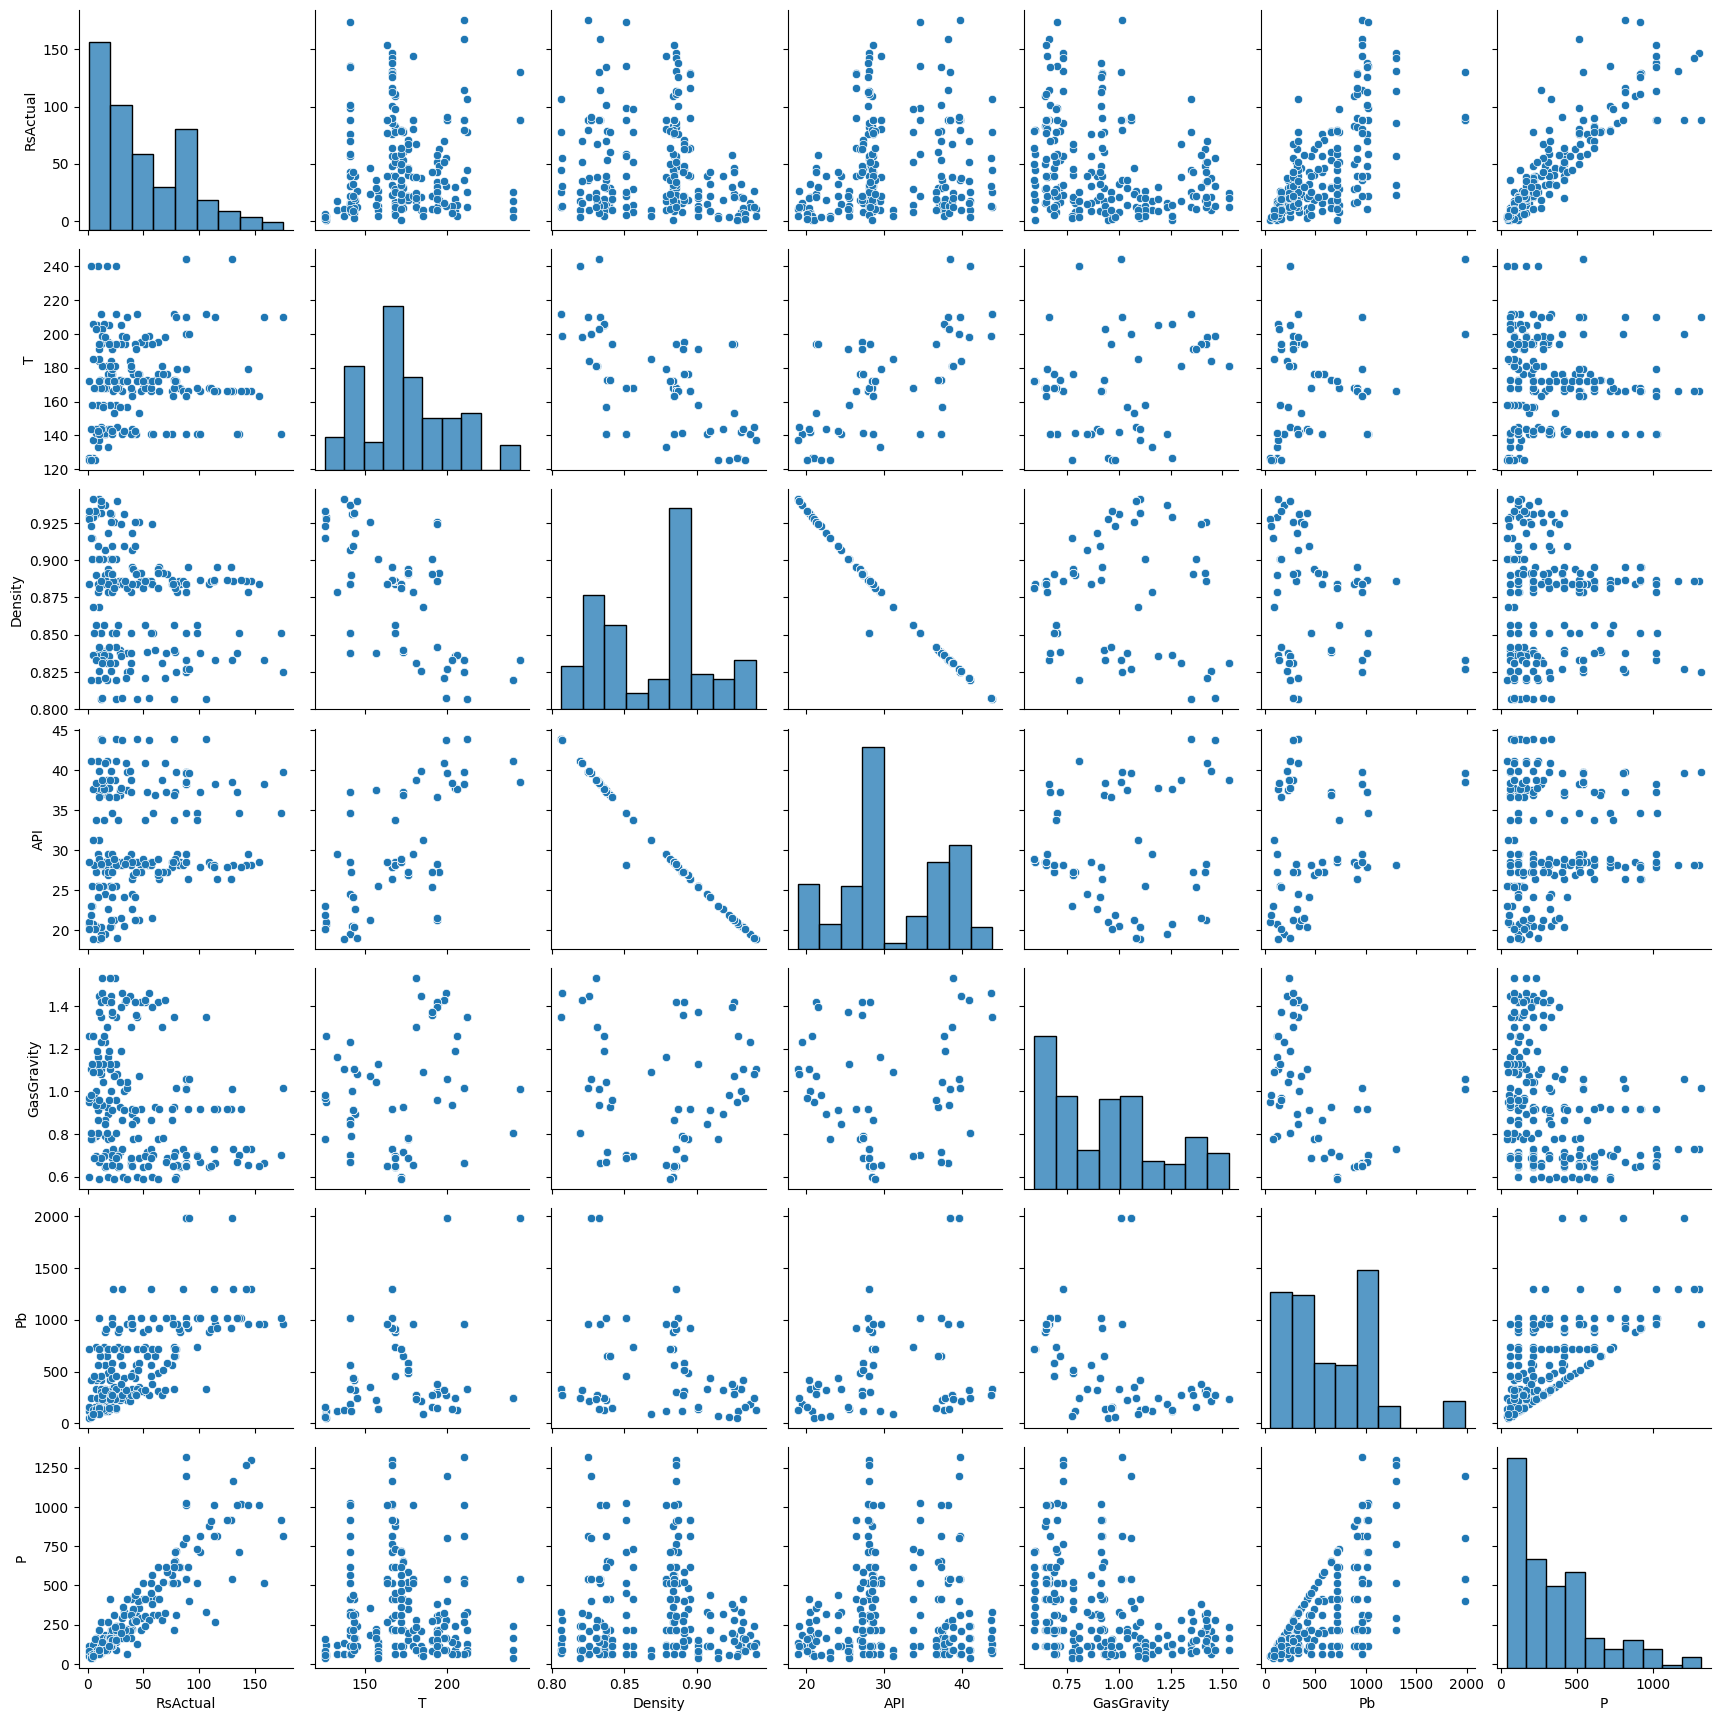

In [29]:
sns.pairplot(df_rs1)

<AxesSubplot:>

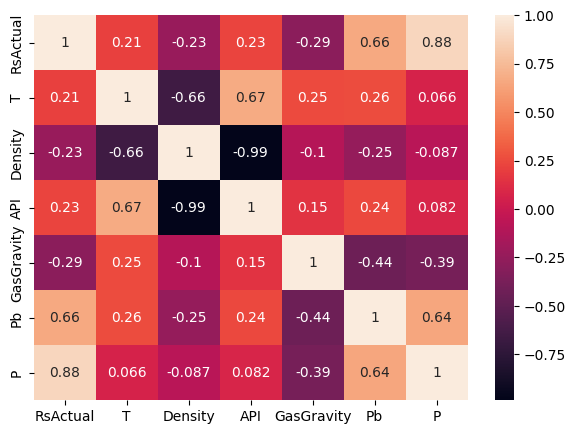

In [30]:
#let’s plot the Pearson correlation coefficient heat map as follows. 
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(df_rs1.corr(),annot=True)

In [31]:
df_rs1.corrwith(df_rs1['RsActual'])

RsActual      1.000000
T             0.211924
Density      -0.226776
API           0.226230
GasGravity   -0.294679
Pb            0.662204
P             0.884517
dtype: float64

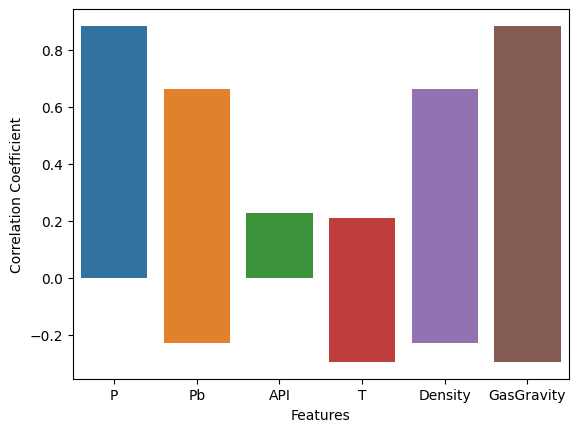

In [32]:
# Calculate the correlation coefficients between the target variable and all other predictor variables
corr = df_rs1.corr()['RsActual']
corr = corr[['T','Density','API','GasGravity','Pb','P']]

# Plot a bar chart or a heatmap of the correlation coefficients
sns.barplot(x=corr.index, y=corr.values)

# Sort the predictor variables by their correlation coefficients
corr_sorted = corr.sort_values(ascending=False)

# Highlight the target variable in the plot
sns.barplot(x=corr_sorted.index, y=corr_sorted.values)
# Add a y-axis label
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

#### From correlation matrix P and Pb has highest correlation value for Rs Actual and Dataset does not have any NULL values ,duplicate values and there are no outliers on the data too. So, we can proceed with the existing data as it is.

In [33]:
# Define input variables
X = df_rs1.iloc[:,1:7] # features
X.shape

(222, 6)

In [34]:
y=df_rs1.iloc[:,0]

In [35]:
y_Rs = pd.concat([y, stand_Rs, vas_beg_Rs, pf_Rs, glaso_Rs, al_Rs, km_Rs], axis=1)
y_Rs.shape

(222, 7)

In [36]:
y_Rs.rename(columns={"Rs":"RsActual","Rs.1":"stand_Rs","Rs.2":"vas_beg_Rs","Rs.3":"petro_farsh_Rs","Rs.4":"glaso_Rs","Rs.5":"almar_Rs","Rs.6":"karto_Rs"},inplace=True)#Renaming the column names 

In [37]:
y_Rs_train, y_Rs_test = train_test_split(y_Rs, test_size=0.3, random_state=42)

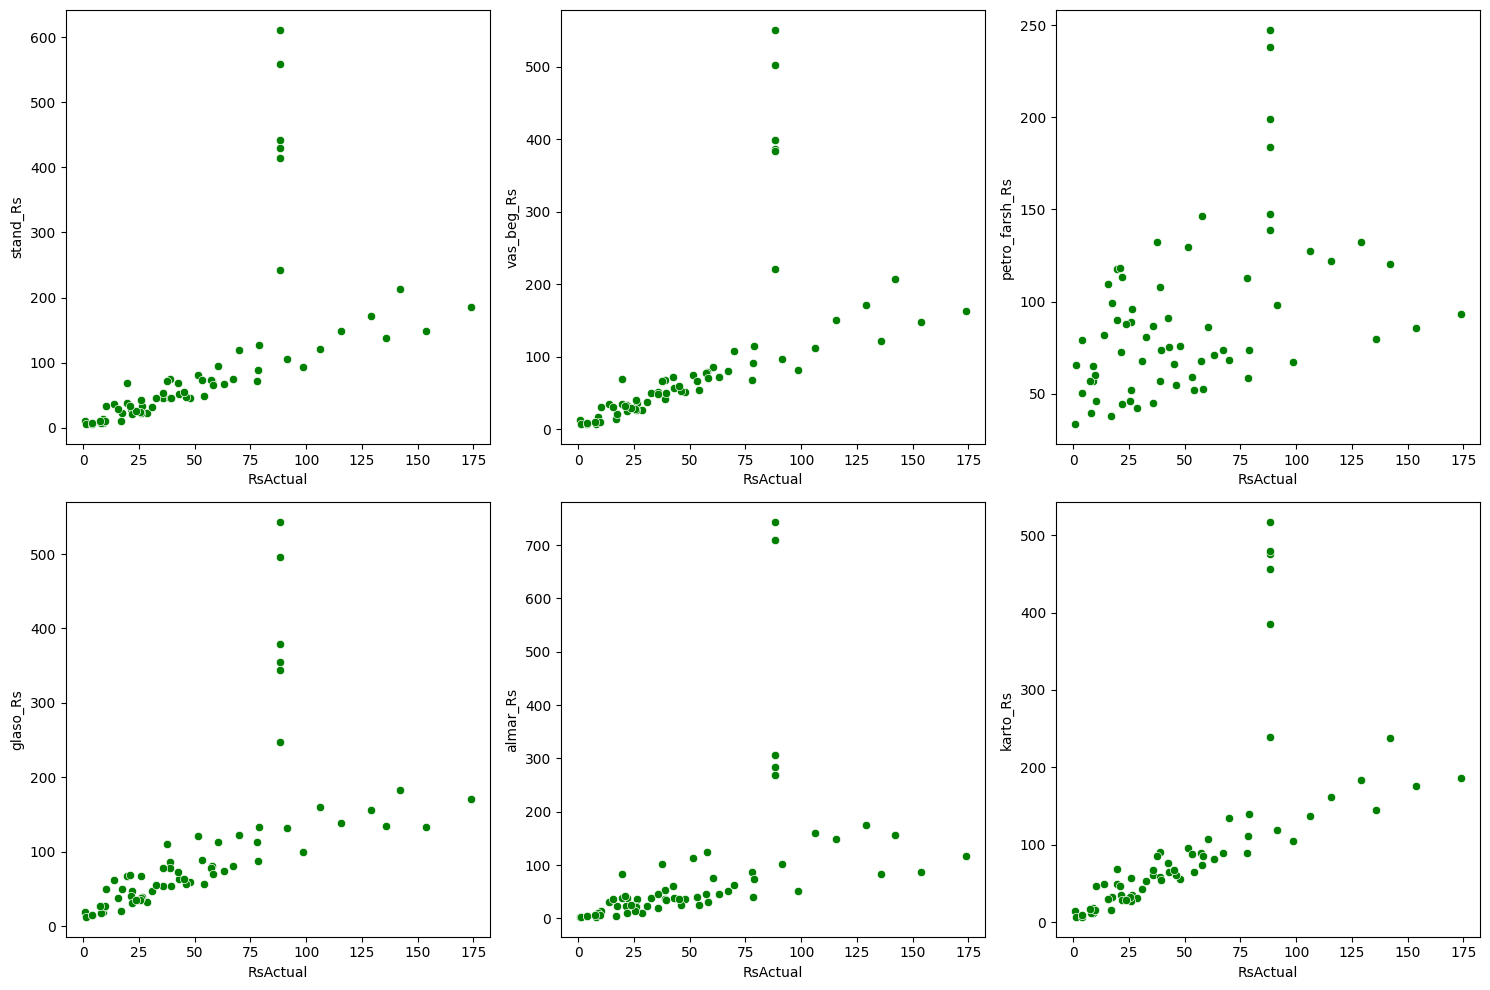

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
k=0
l=0
for i in (y_Rs_test.iloc[:,1:]):
    sns.scatterplot(y_Rs_test.iloc[:,0], y_Rs_test[i], color='g',ax=axes[k, l])
    #plt.ylabel(y_Rs_test[i].columns)
    if (l==0 or l == 1):
        if(l==0):
            l=1
        else:
            l=2
    else:
        l=0
        k=k+1  
    
plt.tight_layout()

In [39]:
y=y.to_numpy()
y=y.reshape(-1,1)

In [40]:
# split the data into train-test dataset 
seed= 50
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
#Standardize the data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#let’s normalize the input features prior to applying multiclassification using StandardScaler
SScalerX=preprocessing.MinMaxScaler()
SScalerY=preprocessing.MinMaxScaler()
# Fit the input  scalers to the training data
SScalerX.fit(X_tr)
SScalerY.fit(y_tr)
# Transform the training and testing data using the scalers
X_scaled_train=SScalerX.transform(X_tr)
X_scaled_test=SScalerX.transform(X_ts)
y_train=SScalerY.transform(y_tr)
y_test=SScalerY.transform(y_ts)

In [42]:
# Define the parameter grid for each model
# linreg_params = {'normalize': [True, False]}
lasso_params = {'alpha': [0.01, 0.1, 1]}
knn_params = {'n_neighbors': np.arange(1, 11)}
rf_params = {'n_estimators': range(10,50,10), 'max_depth': range(5,50,10), 'min_samples_leaf': range(5,50,10)}
ann_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['logistic', 'relu'], 'alpha': [0.0001, 0.001, 0.01]}
svm_params = {'C': [0.001,0.1, 1, 10,100], 'epsilon': [0.001,0.01, 0.1, 1,10]}
gboost_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [3, 4, 5]}
activation = ['relu', 'sigmoid']
optimizer = ['adam', 'sgd']
batch_size = [10, 20, 40]
epochs = [50, 100, 150]
param_grid = dict(activation=activation, optimizer=optimizer, batch_size=batch_size, epochs=epochs)
#param_grid={'activation':['relu', 'sigmoid'],'optimizer':['adam', 'sgd'],'batch_size':[10, 20, 40],'epochs':[50, 100, 150]}

In [43]:
# Define the models to build in the for loop
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
def create_model(activation=activation, optimizer=optimizer):
    model = Sequential()
    model.add(Dense(units=6,input_dim=6, activation=activation)), #Input Layer 
    model.add(Dense(256,activation='tanh')), #Output Layer
    model.add(Dense(128,activation='tanh')),
    model.add(Dense(64,activation='tanh')),
    model.add(Dense(1))#explains the probability 
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model
models = [(Lasso(), lasso_params),
          (KNeighborsRegressor(), knn_params),
          (RandomForestRegressor(), rf_params),
          (MLPRegressor(), ann_params),
          (SVR(), svm_params),
          (GradientBoostingRegressor(), gboost_params),
           (KerasRegressor(build_fn=create_model, verbose=0),param_grid)
         ]

In [44]:
from scipy.stats import pearsonr
# Loop over the models and perform grid search cross-validation
for model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
    grid_search.fit(X_scaled_train, y_train)
    y_pred = grid_search.predict(X_scaled_test)
    mse = mean_squared_error(y_test, y_pred)
    y_test = np.squeeze(y_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r, p_value = pearsonr(y_test,y_pred)
    n = len(y_test)
    aape = (100/n) * sum(abs(y_test[i] - y_pred[i]) / y_test[i] for i in range(n))
    print(str(model))
    print("Best parameters: ", grid_search.best_params_)
    print("Mean squared error: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Lasso()
Best parameters:  {'alpha': 0.01}
Mean squared error: 0.014
R-squared: 0.723
R value:  0.8952954463517115
AAPE: -206.09470134916762
------------------------------------------------------------------------------
KNeighborsRegressor()
Best parameters:  {'n_neighbors': 4}
Mean squared error: 0.011
R-squared: 0.783
R value:  [0.8919078737005647]
AAPE: [-43.67173502]
------------------------------------------------------------------------------
RandomForestRegressor()
Best parameters:  {'max_depth': 35, 'min_samples_leaf': 5, 'n_estimators': 40}
Mean squared error: 0.008
R-squared: 0.837
R value:  0.919538857776555
AAPE: -61.483881326135794
------------------------------------------------------------------------------
MLPRegressor()
Best parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
Mean squared error: 0.011
R-squared: 0.790
R value:  0.895867677070073
AAPE: -54.704198468805195
-------------------------------------------------------------------

In [45]:
from sklearn.model_selection import RandomizedSearchCV

for model, params in models:
    random_search = RandomizedSearchCV(model, params, n_iter=50, cv=5, n_jobs=-1, random_state=42,scoring='neg_mean_squared_error')
    random_search.fit(X_scaled_train, y_train)
    y_pred = random_search.predict(X_scaled_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r, p_value = pearsonr(y_test,y_pred)
    n = len(y_test)
    aape = (100/n) * sum(abs(y_test[i] - y_pred[i]) / y_test[i] for i in range(n))
    print(str(model))
    print("Best parameters: ", random_search.best_params_)
    print("Mean squared error: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Lasso()
Best parameters:  {'alpha': 0.01}
Mean squared error: 0.014
R-squared: 0.723
R value:  0.8952954463517115
AAPE: -206.09470134916762
------------------------------------------------------------------------------
KNeighborsRegressor()
Best parameters:  {'n_neighbors': 4}
Mean squared error: 0.011
R-squared: 0.783
R value:  [0.8919078737005647]
AAPE: [-43.67173502]
------------------------------------------------------------------------------
RandomForestRegressor()
Best parameters:  {'n_estimators': 20, 'min_samples_leaf': 5, 'max_depth': 45}
Mean squared error: 0.008
R-squared: 0.840
R value:  0.9193887071616434
AAPE: -65.17459035277807
------------------------------------------------------------------------------
MLPRegressor()
Best parameters:  {'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'relu'}
Mean squared error: 0.011
R-squared: 0.792
R value:  0.8961922497482343
AAPE: -56.77031000726676
-------------------------------------------------------------------

### Ensemble Model

In [46]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
reg1 =  SVR(epsilon=0.001,C=100)
reg2 = SVR(epsilon=0.01,C=10)
reg3 = RandomForestRegressor(n_estimators= 100, min_samples_leaf= 1, max_depth= 10)
reg4 = SVR(epsilon=0.01,C=100)
reg5 = SVR(epsilon= 0.01, C= 10)
reg6 = SVR(epsilon=0.001,C=10)
reg7 = GradientBoostingRegressor(n_estimators=300,max_depth=3)
reg8 = SVR(epsilon=0.01,C=1000)
#reg9 = DecisionTreeRegressor( n_estimators=300,max_depth=3)
reg10 = GradientBoostingRegressor(n_estimators=300, learning_rate = 0.2,max_depth=3)
reg11 = RandomForestRegressor(n_estimators= 100, min_samples_leaf = 1, max_features= 'sqrt',max_depth= 10)

VC = VotingRegressor(estimators=[('SVR-1',reg1),
                                 ('SVR-2',reg2),
                                 ('RF-GS',reg3),
                                 ('SVR-3',reg4),
                                 ('SVR-4',reg5),
                                  ('SVR-5',reg6),
                                 ('Gradient-3',reg7),
                                 ('SVR-6',reg8),
                                
                                 ('Gradient-4',reg10),
                                 ('RF-4',reg11)])

In [47]:
print('Ensemble Model before Feature Selection - results', '\n')
pred = []
for reg1, name in zip([reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg10,reg11,VC],
                     [ 'SVR-1','SVR-2','RF-GS','SVR-3',
                      'SVR-4','SVR-5','Gradient-3','SVR-6','Gradient-4','RF-4','Voting Regressor']):
    reg1.fit(X_scaled_train, y_train)
    predicted = reg1.predict(X_scaled_test)
    pred.append(predicted)
    print(name, 'R2-score on test:', np.round(r2_score(y_test, predicted),4))
    print(name, 'Test error:', np.round(mean_squared_error(y_test, predicted),4), '\n')
    y_test = np.squeeze(y_test)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    r, p_value = pearsonr(y_test,predicted)
    n = len(y_test)
    aape = (100/n) * sum(abs(y_test[i] - predicted[i]) / y_test[i] for i in range(n))
    print("mse: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Ensemble Model before Feature Selection - results 

SVR-1 R2-score on test: 0.8465
SVR-1 Test error: 0.008 

mse: 0.008
R-squared: 0.846
R value:  0.9250394110491121
AAPE: -10.43081705089324
------------------------------------------------------------------------------
SVR-2 R2-score on test: 0.8396
SVR-2 Test error: 0.0084 

mse: 0.008
R-squared: 0.840
R value:  0.9231782510263205
AAPE: 18.100152033076956
------------------------------------------------------------------------------
RF-GS R2-score on test: 0.8426
RF-GS Test error: 0.0082 

mse: 0.008
R-squared: 0.843
R value:  0.9184845854114242
AAPE: -32.20924383102556
------------------------------------------------------------------------------
SVR-3 R2-score on test: 0.8525
SVR-3 Test error: 0.0077 

mse: 0.008
R-squared: 0.853
R value:  0.928372738495623
AAPE: -0.8450347797765924
------------------------------------------------------------------------------
SVR-4 R2-score on test: 0.8396
SVR-4 Test error: 0.0084 

mse: 0.008
R-sq

In [48]:
st_dev=np.std(pred)
print("StandardDeviation: {:.3f}".format(st_dev))

variance=np.var(pred)
print("Variance: {:.3f}".format(variance))

ssr=mse*len(pred)
print("SSR: {:.3f}".format(ssr))

StandardDeviation: 0.194
Variance: 0.038
SSR: 0.075


#### Performing Feature Selection 

In [49]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

## Sequential Forward Floating Selection(sffs)
sffs = SFS(GradientBoostingRegressor(n_estimators=200, learning_rate = 0.25),
         k_features=(4),    
         forward=True,
         floating=True,
         cv=0)

sffs.fit(X_scaled_train, y_train)
sffs.k_feature_names_

('2', '3', '4', '5')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X[['T','GasGravity', 'Pb', 'P']], y, test_size=0.3, random_state=42)

In [51]:
#Standardize the data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#let’s normalize the input features prior to applying multiclassification using StandardScaler
SScalerX=preprocessing.MinMaxScaler()
SScalerY=preprocessing.MinMaxScaler()
# Fit the input  scalers to the training data
SScalerX.fit(X_tr)
SScalerY.fit(y_tr)
# Transform the training and testing data using the scalers
X_scaled_train=SScalerX.transform(X_tr)
X_scaled_test=SScalerX.transform(X_ts)
y_train=SScalerY.transform(y_tr)
y_test=SScalerY.transform(y_ts)

In [52]:
print('Ensemble Model after Feature Selection - results', '\n')
pred = []
for reg, name in zip([reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg10,reg11,VC],
                     [ 'SVR-1','SVR-2','RF-GS','SVR-3',
                      'SVR-4','SVR-5','Gradient-3','SVR-6','Gradient-4','RF-4','Voting Regressor']):
    reg.fit(X_scaled_train, y_train)
    predicted = reg.predict(X_scaled_test)
    pred.append(predicted)
    print(name, 'R2-score on test:', np.round(r2_score(y_test, predicted),4))
    print(name, 'Test error:', np.round(mean_squared_error(y_test, predicted),4), '\n')
    y_test = np.squeeze(y_test)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    r, p_value = pearsonr(y_test,predicted)
    n = len(y_test)
    aape = (100/n) * sum(abs(y_test[i] - predicted[i]) / y_test[i] for i in range(n))
    print("mse: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Ensemble Model after Feature Selection - results 

SVR-1 R2-score on test: 0.8688
SVR-1 Test error: 0.0068 

mse: 0.007
R-squared: 0.869
R value:  0.9382062456356421
AAPE: 1.2955182986093785
------------------------------------------------------------------------------
SVR-2 R2-score on test: 0.8396
SVR-2 Test error: 0.0084 

mse: 0.008
R-squared: 0.840
R value:  0.9231782510263205
AAPE: 18.100152033076956
------------------------------------------------------------------------------
RF-GS R2-score on test: 0.8523
RF-GS Test error: 0.0077 

mse: 0.008
R-squared: 0.852
R value:  0.9245797268610871
AAPE: -31.414581297672658
------------------------------------------------------------------------------
SVR-3 R2-score on test: 0.8525
SVR-3 Test error: 0.0077 

mse: 0.008
R-squared: 0.853
R value:  0.928372738495623
AAPE: -0.8450347797765924
------------------------------------------------------------------------------
SVR-4 R2-score on test: 0.8396
SVR-4 Test error: 0.0084 

mse: 0.008
R-s

### After feature selection we could see slight difference in AAPE value

Text(0, 0.5, 'Testing Predictions')

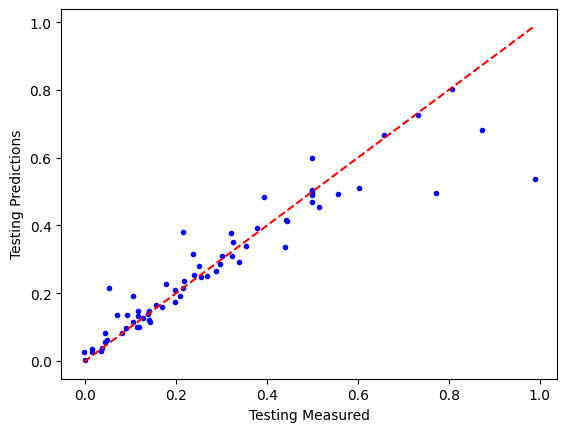

In [53]:
# Assuming y_test and y_pred are arrays of measured and predicted values, respectively
y_pred = reg1.predict(X_scaled_test)
plt.plot(y_test,y_pred, 'b.')
plt.plot(np.linspace(np.min(y_test), np.max(y_test)), np.linspace(np.min(y_test), np.max(y_test)), 'r--')
plt.xlabel('Testing Measured')
plt.ylabel('Testing Predictions')
# plt.title('Measured Vs. Predicted, Testing Data Set (30% of the data)')
